In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
#修改超参数 学习率
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
#grad就是导数
# W = W + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
#初始化空的列表
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    #这里用我们自己的optimizer，原来我们是‘sgd’
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 100,
                        callbacks = callbacks)
    #我们需要保存所有的history
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 7.3222 - val_loss: 6.1576
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 4.6173 - val_loss: 4.0981
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 3.1769 - val_loss: 2.9332
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 2.3553 - val_loss: 2.2411
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 1.8547 - val_loss: 1.8058
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5338 - val_loss: 1.5228
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3181 - val_loss: 1.3313
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1678 - val_loss: 1.1985
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0581 - val_loss: 1.1003
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9763 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.5452 - val_loss: 0.5897
Epoch 25/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 0.5846
Epoch 26/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5357 - val_loss: 0.5796
Epoch 27/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - val_loss: 0.5750
Epoch 28/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5273 - val_loss: 0.5703
Epoch 29/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5235 - val_loss: 0.5661
Epoch 30/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5199 - val_loss: 0.5618
Epoch 31/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5166 - val_loss: 0.5582
Epoch 32/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - val_loss: 0.5548
Epoch 33/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5105 - val_loss: 

363/363 [==============================] - 1s 2ms/step - loss: 0.4054 - val_loss: 0.4234
Epoch 22/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4024 - val_loss: 0.4187
Epoch 23/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 0.4186
Epoch 24/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4059 - val_loss: 0.4154
Epoch 25/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4004 - val_loss: 0.4158
Epoch 26/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3953 - val_loss: 0.4120
Epoch 27/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.4143
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8481 - val_loss: 0.8211
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5606 - val_loss: 0.5127
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4706 - val_loss: 0.4

Learning rate:  0.0001
0.5834941267967224 0.6341761946678162


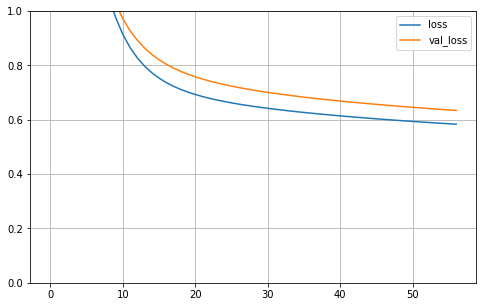

Learning rate:  0.0003
0.48399922251701355 0.5214909911155701


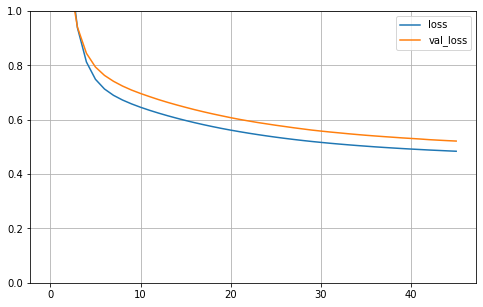

Learning rate:  0.001
0.43650639057159424 0.46012160181999207


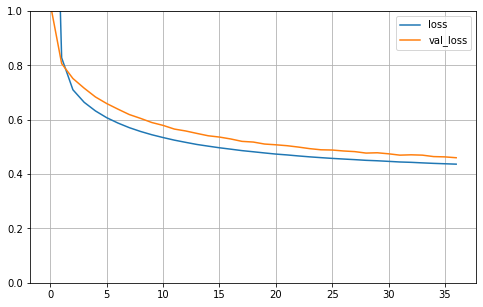

Learning rate:  0.003
0.3931428790092468 0.414307564496994


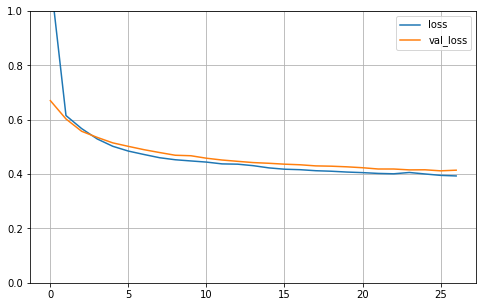

Learning rate:  0.01
0.35711777210235596 0.37109991908073425


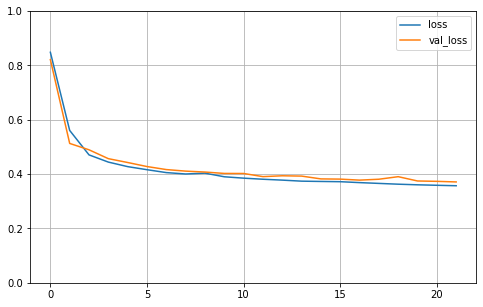

Learning rate:  0.03
nan nan


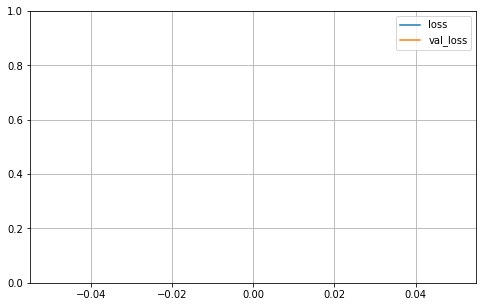

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_learning_curves(history)

In [10]:
history.history

{'loss': [3.799193859100342, nan, nan, nan, nan, nan],
 'val_loss': [43263.31640625, nan, nan, nan, nan, nan]}